# Slamseq iBet spikeIn Max P paper

In [43]:
from __future__ import print_function
import os.path
import pandas as pd
import sys
sys.path.insert(0, '../../')
import seaborn as sns
import numpy as np

from JKBio.Helper import *
from JKBio.helper import pyDESeq2

from bokeh.plotting import *
from bokeh.models import HoverTool
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
#from umap import UMAP

output_notebook()
%load_ext autoreload
%matplotlib inline
%autoreload 2
%load_ext rpy2.ipython

Loading BokehJS ...

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


downloading their data

## downloading the data

In [2]:
version="v2"
project="slamseqMax"
location= '../data/'+project+"/"

In [4]:
mkdir ../$location

In [30]:
!gsutil ls gs://transfer-amlproject/200827_MP8179_fastq/

gs://transfer-amlproject/200827_MP8179_fastq/Reports/20200827_10_MP8179_S169_R1_001_fastqc.html
gs://transfer-amlproject/200827_MP8179_fastq/Reports/20200827_10_MP8179_S169_R1_001_fastqc.zip
gs://transfer-amlproject/200827_MP8179_fastq/Reports/20200827_10_MP8179_S169_R2_001_fastqc.html
gs://transfer-amlproject/200827_MP8179_fastq/Reports/20200827_10_MP8179_S169_R2_001_fastqc.zip
gs://transfer-amlproject/200827_MP8179_fastq/Reports/20200827_11_MP8179_S170_R1_001_fastqc.html
gs://transfer-amlproject/200827_MP8179_fastq/Reports/20200827_11_MP8179_S170_R1_001_fastqc.zip
gs://transfer-amlproject/200827_MP8179_fastq/Reports/20200827_11_MP8179_S170_R2_001_fastqc.html
gs://transfer-amlproject/200827_MP8179_fastq/Reports/20200827_11_MP8179_S170_R2_001_fastqc.zip
gs://transfer-amlproject/200827_MP8179_fastq/Reports/20200827_12_MP8179_S171_R1_001_fastqc.html
gs://transfer-amlproject/200827_MP8179_fastq/Reports/20200827_12_MP8179_S171_R1_001_fastqc.zip
gs://transfer-amlproject/200827_MP8179_fastq/

In [24]:
! gsutil -m cp gs://transfer-amlproject/slamseq_inhibitor_spikeins/*MP8179*.fastq.gz ../../data/$project/fastqs/

Copying gs://transfer-amlproject/slamseq_inhibitor_spikeins/20200827_10_MP8179_S169_R1_001.fastq.gz...
Copying gs://transfer-amlproject/slamseq_inhibitor_spikeins/20200827_10_MP8179_S169_R2_001.fastq.gz...
Copying gs://transfer-amlproject/slamseq_inhibitor_spikeins/20200827_11_MP8179_S170_R2_001.fastq.gz...
Copying gs://transfer-amlproject/slamseq_inhibitor_spikeins/20200827_11_MP8179_S170_R1_001.fastq.gz...
Copying gs://transfer-amlproject/slamseq_inhibitor_spikeins/20200827_12_MP8179_S171_R1_001.fastq.gz...
Copying gs://transfer-amlproject/slamseq_inhibitor_spikeins/20200827_12_MP8179_S171_R2_001.fastq.gz...
Copying gs://transfer-amlproject/slamseq_inhibitor_spikeins/20200827_13_MP8179_S172_R1_001.fastq.gz...
Copying gs://transfer-amlproject/slamseq_inhibitor_spikeins/20200827_13_MP8179_S172_R2_001.fastq.gz...
Copying gs://transfer-amlproject/slamseq_inhibitor_spikeins/20200827_14_MP8179_S173_R1_001.fastq.gz...
Copying gs://transfer-amlproject/slamseq_inhibitor_spikeins/20200827_14_M

In [21]:
ls ../../data/$project/fastqs

mr193-MV411-MYBi_30m-r1_R1_001.fastq.gz_trimming_report.txt
mr193-MV411-MYBi_30m-r1_R1_001_unpaired_1.fq.gz
mr193-MV411-MYBi_30m-r1_R1_001_val_1.fq.gz
mr193-MV411-MYBi_30m-r1_R2_001.fastq.gz_trimming_report.txt
mr193-MV411-MYBi_30m-r1_R2_001_unpaired_2.fq.gz
mr193-MV411-MYBi_30m-r1_R2_001_val_2.fq.gz
mr194-MV411-MYBi_30m-r2_R1_001.fastq.gz_trimming_report.txt
mr194-MV411-MYBi_30m-r2_R1_001_unpaired_1.fq.gz
mr194-MV411-MYBi_30m-r2_R1_001_val_1.fq.gz
mr194-MV411-MYBi_30m-r2_R2_001.fastq.gz_trimming_report.txt
mr194-MV411-MYBi_30m-r2_R2_001_unpaired_2.fq.gz
mr194-MV411-MYBi_30m-r2_R2_001_val_2.fq.gz
mr195-MV411-MYBi_30m-r3_R1_001.fastq.gz_trimming_report.txt
mr195-MV411-MYBi_30m-r3_R1_001_unpaired_1.fq.gz
mr195-MV411-MYBi_30m-r3_R1_001_val_1.fq.gz
mr195-MV411-MYBi_30m-r3_R2_001.fastq.gz_trimming_report.txt
mr195-MV411-MYBi_30m-r3_R2_001_unpaired_2.fq.gz
mr195-MV411-MYBi_30m-r3_R2_001_val_2.fq.gz
mr196-MV411-MYBi_30m-r4_R1_001.fastq.gz_trimming_report.txt
mr196-MV411-MYBi_30m-r4_R1_001_unp

## Running slamdunk

In [ ]:
#if need to download the data from sra
! mkdir ../../data/slam/MYCpaper && cd ../../data/slam/MYCpaper && fastq_dump SRR5806781 && fastq_dump SRR5806783 && fastq_dump SRR5806785 &&
fastq_dump SRR5806780 && fastq_dump SRR5806782 && fastq_dump SRR5806784 && cd -

In [32]:
folder_bams = "../../data/"+project+'/fastqs'
bams = ! ls $folder_bams/*
bams

['../../data/slamseqMax/fastqs/20200827_10_MP8179_S169_R1_001.fastq.gz',
 '../../data/slamseqMax/fastqs/20200827_10_MP8179_S169_R2_001.fastq.gz',
 '../../data/slamseqMax/fastqs/20200827_11_MP8179_S170_R1_001.fastq.gz',
 '../../data/slamseqMax/fastqs/20200827_11_MP8179_S170_R2_001.fastq.gz',
 '../../data/slamseqMax/fastqs/20200827_12_MP8179_S171_R1_001.fastq.gz',
 '../../data/slamseqMax/fastqs/20200827_12_MP8179_S171_R2_001.fastq.gz',
 '../../data/slamseqMax/fastqs/20200827_13_MP8179_S172_R1_001.fastq.gz',
 '../../data/slamseqMax/fastqs/20200827_13_MP8179_S172_R2_001.fastq.gz',
 '../../data/slamseqMax/fastqs/20200827_14_MP8179_S173_R1_001.fastq.gz',
 '../../data/slamseqMax/fastqs/20200827_14_MP8179_S173_R2_001.fastq.gz',
 '../../data/slamseqMax/fastqs/20200827_15_MP8179_S174_R1_001.fastq.gz',
 '../../data/slamseqMax/fastqs/20200827_15_MP8179_S174_R2_001.fastq.gz',
 '../../data/slamseqMax/fastqs/20200827_16_MP8179_S175_R1_001.fastq.gz',
 '../../data/slamseqMax/fastqs/20200827_16_MP8179_S

In [31]:
rename = {
"20200707_1_MP8000_S65": "mr193-MV411-MYBi_30m-r1",
"20200707_2_MP8000_S66": "mr194-MV411-MYBi_30m-r2",
"20200707_3_MP8000_S67": "mr195-MV411-MYBi_30m-r3",
"20200707_4_MP8000_S68": "mr196-MV411-MYBi_30m-r4",
"20200707_5_MP8000_S69": "mr197-MV411-PBS_30m-r1",
"20200707_6_MP8000_S70": "mr198-MV411-PBS_30m-r2",
"20200707_7_MP8000_S71": "mr199-MV411-PBS_30m-r3",
"20200707_8_MP8000_S72": "mr200-MV411-PBS_30m-r4",
"20200707_9_MP8000_S73": "mr201-MV411-MYBi_6h-r1",
"20200707_10_MP8000_S74": "mr202-MV411-MYBi_6h-r2",
"20200707_11_MP8000_S75": "mr203-MV411-MYBi_6h-r3",
"20200707_12_MP8000_S76": "mr204-MV411-MYBi_6h-r4",
"20200707_13_MP8000_S77": "mr205-MV411-PBS_6h-r1",
"20200707_14_MP8000_S78": "mr206-MV411-PBS_6h-r2",
"20200707_15_MP8000_S79": "mr207-MV411-PBS_6h-r3",
"20200703_16_MP800_S103": "mr208-MV411-MS2-r1",
"20200703_17_MP800_S104": "mr209-MV411-MS2-r2",
"20200703_18_MP800_S105": "mr210-MV411-MS2-r3",
"20200703_19_MP800_S106": "mr211-MV411-JQ1-r1",
"20200703_20_MP800_S107": "mr212-MV411-JQ1-r2",
"20200703_21_MP800_S108": "mr213-MV411-JQ1-r3",
"20200703_22_MP800_S109": "mr214-MV411-MS2_JQ1-r1",
"20200703_23_MP800_S110": "mr215-MV411-MS2_JQ1-r2",
"20200703_24_MP800_S111": "mr216-MV411-MS2_JQ1-r3",
"20200703_25_MP800_S112": "mr217-MV411-DMSO-r1",
"20200703_26_MP800_S113": "mr218-MV411-DMSO-r2",
"20200703_27_MP800_S114": "mr219-MV411-DMSO-r3",
"20200827_1_MP8179_S160": "mr252-MV411_MEF2D-DMSO_2h-r1",
"20200827_2_MP8179_S161": "mr253-MV411_MEF2D-DMSO_2h-r2",
"20200827_3_MP8179_S162": "mr254-MV411_MEF2D-DMSO_2h-r3",
"20200827_4_MP8179_S163": "mr255-MV411_MEF2D-DMSO_2h-r4",
"20200827_5_MP8179_S164": "mr256-MV411_MEF2D-VHL_2h-r1",
"20200827_6_MP8179_S165": "mr257-MV411_MEF2D-VHL_2h-r2",
"20200827_7_MP8179_S166": "mr258-MV411_MEF2D-VHL_2h-r3",
"20200827_8_MP8179_S167": "mr259-MV411_MEF2D-VHL_2h-r4",
"20200827_9_MP8179_S168": "mr260-MV411_MEF2D-DMSO_24h-r1",
"20200827_10_MP8179_S169": "mr261-MV411_MEF2D-DMSO_24h-r2",
"20200827_11_MP8179_S170": "mr262-MV411_MEF2D-DMSO_24h-r3",
"20200827_12_MP8179_S171": "mr263-MV411_MEF2D-DMSO_24h-r4",
"20200827_13_MP8179_S172": "mr264-MV411_MEF2D-VHL_24h-r1",
"20200827_14_MP8179_S173": "mr265-MV411_MEF2D-VHL_24h-r2",
"20200827_15_MP8179_S174": "mr266-MV411_MEF2D-VHL_24h-r3",
"20200827_16_MP8179_S175": "mr267-MV411_MEF2D-VHL_24h-r4",
"20200827_17_MP8179_S176": "mr268-MV411-PBS_24h-r1",
"20200827_18_MP8179_S177": "mr269-MV411-PBS_24h-r2",
"20200827_19_MP8179_S178": "mr270-MV411-PBS_24h-r3",
"20200827_20_MP8179_S179": "mr271-MV411-PBS_24h-r4",
"20200827_21_MP8179_S180": "mr272-MV411-MYBi_24h-r1",
"20200827_23_MP8179_S181": "mr273-MV411-MYBi_24h-r2",
"20200827_24_MP8179_S182": "mr274-MV411-MYBi_24h-r3",
}

In [34]:
for val in bams:
    ren  = val
    for old, new in rename.items():
        ren = ren.replace(old, new)
    if ren !=val:
        ! mv $val $ren

In [35]:
folder="../../data/"+project
folder_bams = folder+'/fastqs/'
bams = ! ls $folder_bams/*.fastq.gz
bams

['../../data/slamseqMax/fastqs//mr252-MV411_MEF2D-DMSO_2h-r1_R1_001.fastq.gz',
 '../../data/slamseqMax/fastqs//mr252-MV411_MEF2D-DMSO_2h-r1_R2_001.fastq.gz',
 '../../data/slamseqMax/fastqs//mr253-MV411_MEF2D-DMSO_2h-r2_R1_001.fastq.gz',
 '../../data/slamseqMax/fastqs//mr253-MV411_MEF2D-DMSO_2h-r2_R2_001.fastq.gz',
 '../../data/slamseqMax/fastqs//mr254-MV411_MEF2D-DMSO_2h-r3_R1_001.fastq.gz',
 '../../data/slamseqMax/fastqs//mr254-MV411_MEF2D-DMSO_2h-r3_R2_001.fastq.gz',
 '../../data/slamseqMax/fastqs//mr255-MV411_MEF2D-DMSO_2h-r4_R1_001.fastq.gz',
 '../../data/slamseqMax/fastqs//mr255-MV411_MEF2D-DMSO_2h-r4_R2_001.fastq.gz',
 '../../data/slamseqMax/fastqs//mr256-MV411_MEF2D-VHL_2h-r1_R1_001.fastq.gz',
 '../../data/slamseqMax/fastqs//mr256-MV411_MEF2D-VHL_2h-r1_R2_001.fastq.gz',
 '../../data/slamseqMax/fastqs//mr257-MV411_MEF2D-VHL_2h-r2_R1_001.fastq.gz',
 '../../data/slamseqMax/fastqs//mr257-MV411_MEF2D-VHL_2h-r2_R2_001.fastq.gz',
 '../../data/slamseqMax/fastqs//mr258-MV411_MEF2D-VHL_2h

In [4]:
! pip3 install git+https://github.com/jkobject/slamdunk.git --upgrade
# please also install trimgalore and cutadapt

  Cloning https://github.com/jkobject/slamdunk.git to /tmp/pip-req-build-qa580_ce
  Running setup.py bdist_wheel for slamdunk ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-cggtrlco/wheels/4c/b2/9c/e1153807b1571f6f12ee9761dcf5229ceee161c5c575b631fd
Successfully built slamdunk
  Found existing installation: slamdunk 0.4.0
    Uninstalling slamdunk-0.4.0:
      Successfully uninstalled slamdunk-0.4.0


In [36]:
parrun(['../../TrimGalore-0.6.5/trim_galore --paired --cores 4 --retain_unpaired -stringency 3 --illumina '+val1+ ' '+val2+' -o '+folder_bams for val1,val2 in grouped(bams,2)],2)

In [ ]:
rm fastqs/*.fastq.gz

In [23]:
ls -al ../../data/$project/fastqs

total 323740620
drwxr-xr-x 2 jeremie jeremie      20480 Jul 16 23:59 ./
drwxr-xr-x 3 jeremie jeremie       4096 Jul 16 16:48 ../
-rw-r--r-- 1 jeremie jeremie 1972661712 Jul 16 16:09 mr193-MV411-MYBi_30m-r1_R1_001.fastq.gz
-rw-r--r-- 1 jeremie jeremie       4078 Jul 16 17:28 mr193-MV411-MYBi_30m-r1_R1_001.fastq.gz_trimming_report.txt
-rw-r--r-- 1 jeremie jeremie 1745221196 Jul 16 17:28 mr193-MV411-MYBi_30m-r1_R1_001_trimmed.fq.gz
-rw-r--r-- 1 jeremie jeremie 2001846977 Jul 16 16:11 mr193-MV411-MYBi_30m-r1_R2_001.fastq.gz
-rw-r--r-- 1 jeremie jeremie       4042 Jul 16 18:04 mr193-MV411-MYBi_30m-r1_R2_001.fastq.gz_trimming_report.txt
-rw-r--r-- 1 jeremie jeremie 1771675421 Jul 16 18:04 mr193-MV411-MYBi_30m-r1_R2_001_trimmed.fq.gz
-rw-r--r-- 1 jeremie jeremie 1883635938 Jul 16 16:11 mr194-MV411-MYBi_30m-r2_R1_001.fastq.gz
-rw-r--r-- 1 jeremie jeremie       4101 Jul 16 18:03 mr194-MV411-MYBi_30m-r2_R1_001.fastq.gz_trimming_report.txt
-rw-r--r-- 1 jeremie jeremie 1656441393 Jul 16 18:03 mr19

In [37]:
# using an ERCC ref genome (you can just append ERCC fasta to the hg38 fasta)
refgenome="../../data/ref/Homo_sapiens_assembly38_ERCC92.fasta"

In [44]:
bams

['../../data/slamseqMax/fastqs//mr252-MV411_MEF2D-DMSO_2h-r1_R1_001.fastq.gz',
 '../../data/slamseqMax/fastqs//mr252-MV411_MEF2D-DMSO_2h-r1_R2_001.fastq.gz',
 '../../data/slamseqMax/fastqs//mr253-MV411_MEF2D-DMSO_2h-r2_R1_001.fastq.gz',
 '../../data/slamseqMax/fastqs//mr253-MV411_MEF2D-DMSO_2h-r2_R2_001.fastq.gz',
 '../../data/slamseqMax/fastqs//mr254-MV411_MEF2D-DMSO_2h-r3_R1_001.fastq.gz',
 '../../data/slamseqMax/fastqs//mr254-MV411_MEF2D-DMSO_2h-r3_R2_001.fastq.gz',
 '../../data/slamseqMax/fastqs//mr255-MV411_MEF2D-DMSO_2h-r4_R1_001.fastq.gz',
 '../../data/slamseqMax/fastqs//mr255-MV411_MEF2D-DMSO_2h-r4_R2_001.fastq.gz',
 '../../data/slamseqMax/fastqs//mr256-MV411_MEF2D-VHL_2h-r1_R1_001.fastq.gz',
 '../../data/slamseqMax/fastqs//mr256-MV411_MEF2D-VHL_2h-r1_R2_001.fastq.gz',
 '../../data/slamseqMax/fastqs//mr257-MV411_MEF2D-VHL_2h-r2_R1_001.fastq.gz',
 '../../data/slamseqMax/fastqs//mr257-MV411_MEF2D-VHL_2h-r2_R2_001.fastq.gz',
 '../../data/slamseqMax/fastqs//mr258-MV411_MEF2D-VHL_2h

In [46]:
# we are doing it paired end
parrun(['slamdunk all -r '+refgenome+' -b ../data/Muhar_Slamseq/GSE100708_hg38_refseq_062016_ensemblv84_3UTR.bed \
    -o ../../data/'+project+'/res/ -t 8 -c 2 -N '+val1.split('/')[-1].split('_R')[0]+' '+val1.replace('.fastq.gz','_val_1.fq.gz')+" "+val2.replace('.fastq.gz','_val_2.fq.gz') for val1,val2 in grouped(bams[4:],2)], 2)

In [47]:
ls ../../data/$project/res/count/*.tsv

../../data/slamseqMax/res/count/mr252-MV411_MEF2D-DMSO_2h-r1_tcount.tsv
../../data/slamseqMax/res/count/mr253-MV411_MEF2D-DMSO_2h-r2_tcount.tsv
../../data/slamseqMax/res/count/mr254-MV411_MEF2D-DMSO_2h-r3_tcount.tsv
../../data/slamseqMax/res/count/mr255-MV411_MEF2D-DMSO_2h-r4_tcount.tsv
../../data/slamseqMax/res/count/mr256-MV411_MEF2D-VHL_2h-r1_tcount.tsv
../../data/slamseqMax/res/count/mr257-MV411_MEF2D-VHL_2h-r2_tcount.tsv
../../data/slamseqMax/res/count/mr258-MV411_MEF2D-VHL_2h-r3_tcount.tsv
../../data/slamseqMax/res/count/mr259-MV411_MEF2D-VHL_2h-r4_tcount.tsv
../../data/slamseqMax/res/count/mr260-MV411_MEF2D-DMSO_24h-r1_tcount.tsv
../../data/slamseqMax/res/count/mr261-MV411_MEF2D-DMSO_24h-r2_tcount.tsv
../../data/slamseqMax/res/count/mr262-MV411_MEF2D-DMSO_24h-r3_tcount.tsv
../../data/slamseqMax/res/count/mr263-MV411_MEF2D-DMSO_24h-r4_tcount.tsv
../../data/slamseqMax/res/count/mr264-MV411_MEF2D-VHL_24h-r1_tcount.tsv
../../data/slamseqMax/res/count/mr265-MV411_MEF2D-VHL_24h-r2_tco

## we first need to recreate out RNA matrix from slamdunk's tcount files

In [358]:
!gsutil -m cp -r ../../data/$project/* gs://amlproject/RNA/slamseq_iBet_max/

Copying file://../../data/slamseqMax/fastqs/mr206-MV411-PBS_6h-r2_R2_001_unpaired_2.fq.gz [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/fastqs/mr196-MV411-MYBi_30m-r4_R1_001.fastq.gz_trimming_report.txt [Content-Type=text/plain]...
Copying file://../../data/slamseqMax/fastqs/mr212-MV411-JQ1-r2_R2_001.fastq.gz_trimming_report.txt [Content-Type=text/plain]...
Copying file://../../data/slamseqMax/fastqs/mr209-MV411-MS2-r2_R1_001.fastq.gz_trimming_report.txt [Content-Type=text/plain]...
Copying file://../../data/slamseqMax/fastqs/mr193-MV411-MYBi_30m-r1_R1_001.fastq.gz_trimming_report.txt [Content-Type=text/plain]...
Copying file://../../data/slamseqMax/fastqs/mr195-MV411-MYBi_30m-r3_R1_001_val_1.fq.gz [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/fastqs/mr200-MV411-PBS_30m-r4_R2_001_val_2.fq.gz [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/fastqs/mr207-MV411-PBS_6h-r3_R1_001_unpaired_1.fq

Copying file://../../data/slamseqMax/fastqs/mr211-MV411-JQ1-r1_R1_001_unpaired_1.fq.gz [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/fastqs/mr208-MV411-MS2-r1_R1_001_val_1.fq.gz [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/fastqs/mr202-MV411-MYBi_6h-r2_R2_001.fastq.gz_trimming_report.txt [Content-Type=text/plain]...
Copying file://../../data/slamseqMax/fastqs/mr204-MV411-MYBi_6h-r4_R1_001_unpaired_1.fq.gz [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/fastqs/mr215-MV411-MS2_JQ1-r2_R2_001_unpaired_2.fq.gz [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/fastqs/mr214-MV411-MS2_JQ1-r1_R2_001_val_2.fq.gz [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/fastqs/mr216-MV411-MS2_JQ1-r3_R2_001_unpaired_2.fq.gz [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/fastqs/mr207-MV411-PBS_6h-r3_R2_001_unpaired_

Copying file://../../data/slamseqMax/fastqs/mr214-MV411-MS2_JQ1-r1_R2_001.fastq.gz_trimming_report.txt [Content-Type=text/plain]...
Copying file://../../data/slamseqMax/fastqs/mr217-MV411-DMSO-r1_R1_001.fastq.gz_trimming_report.txt [Content-Type=text/plain]...
Copying file://../../data/slamseqMax/fastqs/mr208-MV411-MS2-r1_R2_001_unpaired_2.fq.gz [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/fastqs/mr200-MV411-PBS_30m-r4_R2_001_unpaired_2.fq.gz [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/fastqs/mr208-MV411-MS2-r1_R1_001_unpaired_1.fq.gz [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/fastqs/mr206-MV411-PBS_6h-r2_R1_001_unpaired_1.fq.gz [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/fastqs/mr206-MV411-PBS_6h-r2_R2_001.fastq.gz_trimming_report.txt [Content-Type=text/plain]...
Copying file://../../data/slamseqMax/fastqs/mr203-MV411-MYBi_6h-r3_R2_001.fastq.g

Copying file://../../data/slamseqMax/res/count/mr216-MV411-MS2_JQ1-r3_tcount.tsv [Content-Type=text/tab-separated-values]...
Copying file://../../data/slamseqMax/res/count/mr209-MV411-MS2-r2_tcount_plus.bedgraph [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/res/count/mr193-MV411-MYBi_30m-r1_tcount.tsv [Content-Type=text/tab-separated-values]...
Copying file://../../data/slamseqMax/res/count/mr207-MV411-PBS_6h-r3_tcount.log [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/res/count/mr217-MV411-DMSO-r1_tcount_mins.bedgraph [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/res/count/mr201-MV411-MYBi_6h-r1_tcount_plus.bedgraph [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/res/count/mr208-MV411-MS2-r1_tcount_plus.bedgraph [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/res/count/mr218-MV411-DMSO-r2_tcount_plus.bedgraph [Content-Type

Copying file://../../data/slamseqMax/res/filter/mr200-MV411-PBS_30m-r4_filtered.log [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/res/filter/mr199-MV411-PBS_30m-r3_filtered.log [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/res/filter/mr200-MV411-PBS_30m-r4_filtered.bam [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/res/filter/mr200-MV411-PBS_30m-r4_filtered.bam.bai [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/res/filter/mr195-MV411-MYBi_30m-r3_filtered.bam.bai [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/res/filter/mr212-MV411-JQ1-r2_filtered.bam.bai [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/res/filter/mr207-MV411-PBS_6h-r3_filtered.bam [Content-Type=application/octet-stream]...
Copying file://../../data/slamseqMax/res/filter/mr208-MV411-MS2-r1_filtered.bam [Content-Type=applicati

### Getting counts over ERCC genome

In [73]:
counts = {}
folder = "../../data/slamseqMax/res/filter"
files = ! ls $folder/mr*
files = [file.split('/')[-1] for file in files if file.endswith(".bam")]

In [74]:
files

['mr252-MV411_MEF2D-DMSO_2h-r1_filtered.bam',
 'mr253-MV411_MEF2D-DMSO_2h-r2_filtered.bam',
 'mr254-MV411_MEF2D-DMSO_2h-r3_filtered.bam',
 'mr255-MV411_MEF2D-DMSO_2h-r4_filtered.bam',
 'mr256-MV411_MEF2D-VHL_2h-r1_filtered.bam',
 'mr257-MV411_MEF2D-VHL_2h-r2_filtered.bam',
 'mr258-MV411_MEF2D-VHL_2h-r3_filtered.bam',
 'mr259-MV411_MEF2D-VHL_2h-r4_filtered.bam',
 'mr260-MV411_MEF2D-DMSO_24h-r1_filtered.bam',
 'mr261-MV411_MEF2D-DMSO_24h-r2_filtered.bam',
 'mr262-MV411_MEF2D-DMSO_24h-r3_filtered.bam',
 'mr263-MV411_MEF2D-DMSO_24h-r4_filtered.bam',
 'mr264-MV411_MEF2D-VHL_24h-r1_filtered.bam',
 'mr265-MV411_MEF2D-VHL_24h-r2_filtered.bam',
 'mr266-MV411_MEF2D-VHL_24h-r3_filtered.bam',
 'mr267-MV411_MEF2D-VHL_24h-r4_filtered.bam',
 'mr268-MV411-PBS_24h-r1_filtered.bam',
 'mr269-MV411-PBS_24h-r2_filtered.bam',
 'mr270-MV411-PBS_24h-r3_filtered.bam',
 'mr271-MV411-PBS_24h-r4_filtered.bam',
 'mr272-MV411-MYBi_24h-r1_filtered.bam',
 'mr273-MV411-MYBi_24h-r2_filtered.bam',
 'mr274-MV411-MYBi_24h

In [64]:
parrun(["samtools view -hb "+folder+"/"+f+" ERCC-00002 ERCC-00003 ERCC-00004 ERCC-00009 ERCC-00012 ERCC-00013 ERCC-00014 ERCC-00016 ERCC-00017 ERCC-00019 ERCC-00022 ERCC-00024 ERCC-00025 ERCC-00028 ERCC-00031 ERCC-00033 ERCC-00034 ERCC-00035 ERCC-00039 ERCC-00040 ERCC-00041 ERCC-00042 ERCC-00043 ERCC-00044 ERCC-00046 ERCC-00048 ERCC-00051 ERCC-00053 ERCC-00054 ERCC-00057 ERCC-00058 ERCC-00059 ERCC-00060 ERCC-00061 ERCC-00062 ERCC-00067 ERCC-00069 ERCC-00071 ERCC-00073 ERCC-00074 ERCC-00075 ERCC-00076 ERCC-00077 ERCC-00078 ERCC-00079 ERCC-00081 ERCC-00083 ERCC-00084 ERCC-00085 ERCC-00086 ERCC-00092 ERCC-00095 ERCC-00096 ERCC-00097 ERCC-00098 ERCC-00099 ERCC-00104 ERCC-00108 ERCC-00109 ERCC-00111 ERCC-00112 ERCC-00113 ERCC-00116 ERCC-00117 ERCC-00120 ERCC-00123 ERCC-00126 ERCC-00130 ERCC-00131 ERCC-00134 ERCC-00136 ERCC-00137 ERCC-00138 ERCC-00142 ERCC-00143 ERCC-00144 ERCC-00145 ERCC-00147 ERCC-00148 ERCC-00150 ERCC-00154 ERCC-00156 ERCC-00157 ERCC-00158 ERCC-00160 ERCC-00162 ERCC-00163 ERCC-00164 ERCC-00165 ERCC-00168 ERCC-00170 ERCC-00171 > "+folder+"/ERCC_"+f for f in files],cores=10)

In [65]:
parrun(["bedtools genomecov -ibam "+folder+"/ERCC_"+f+" > "+folder+"/"+f+".bed" for f in files],cores=10)

In [67]:
ERCC = ["ERCC-00002", "ERCC-00003", "ERCC-00004", "ERCC-00009", "ERCC-00012", "ERCC-00013", "ERCC-00014", "ERCC-00016", "ERCC-00017", "ERCC-00019", "ERCC-00022", "ERCC-00024", "ERCC-00025", "ERCC-00028", "ERCC-00031", "ERCC-00033", "ERCC-00034", "ERCC-00035", "ERCC-00039", "ERCC-00040", "ERCC-00041", "ERCC-00042", "ERCC-00043", "ERCC-00044", "ERCC-00046", "ERCC-00048", "ERCC-00051", "ERCC-00053", "ERCC-00054", "ERCC-00057", "ERCC-00058", "ERCC-00059", "ERCC-00060", "ERCC-00061", "ERCC-00062", "ERCC-00067", "ERCC-00069", "ERCC-00071", "ERCC-00073", "ERCC-00074", "ERCC-00075", "ERCC-00076", "ERCC-00077", "ERCC-00078", "ERCC-00079", "ERCC-00081", "ERCC-00083", "ERCC-00084", "ERCC-00085", "ERCC-00086", "ERCC-00092", "ERCC-00095", "ERCC-00096", "ERCC-00097", "ERCC-00098", "ERCC-00099", "ERCC-00104", "ERCC-00108", "ERCC-00109", "ERCC-00111", "ERCC-00112", "ERCC-00113", "ERCC-00116", "ERCC-00117", "ERCC-00120", "ERCC-00123", "ERCC-00126", "ERCC-00130", "ERCC-00131", "ERCC-00134", "ERCC-00136", "ERCC-00137", "ERCC-00138", "ERCC-00142", "ERCC-00143", "ERCC-00144", "ERCC-00145", "ERCC-00147", "ERCC-00148", "ERCC-00150", "ERCC-00154", "ERCC-00156", "ERCC-00157", "ERCC-00158", "ERCC-00160", "ERCC-00162", "ERCC-00163", "ERCC-00164", "ERCC-00165", "ERCC-00168", "ERCC-00170", "ERCC-00171"]
res  = {i:[] for i in files}
for val in files:
    cov = pd.read_csv(folder+"/"+val+".bed",sep="\t",header=None)
    for i in ERCC:
        res[val].append(cov[cov[0]==i][1].mean())
df = pd.DataFrame(data=res,index=ERCC)

In [79]:
ls ../../data/slamseqMax/res/filter/mr*.bam

../../data/slamseqMax/res/filter/mr252-MV411_MEF2D-DMSO_2h-r1_filtered.bam
../../data/slamseqMax/res/filter/mr253-MV411_MEF2D-DMSO_2h-r2_filtered.bam
../../data/slamseqMax/res/filter/mr254-MV411_MEF2D-DMSO_2h-r3_filtered.bam
../../data/slamseqMax/res/filter/mr255-MV411_MEF2D-DMSO_2h-r4_filtered.bam
../../data/slamseqMax/res/filter/mr256-MV411_MEF2D-VHL_2h-r1_filtered.bam
../../data/slamseqMax/res/filter/mr257-MV411_MEF2D-VHL_2h-r2_filtered.bam
../../data/slamseqMax/res/filter/mr258-MV411_MEF2D-VHL_2h-r3_filtered.bam
../../data/slamseqMax/res/filter/mr259-MV411_MEF2D-VHL_2h-r4_filtered.bam
../../data/slamseqMax/res/filter/mr260-MV411_MEF2D-DMSO_24h-r1_filtered.bam
../../data/slamseqMax/res/filter/mr261-MV411_MEF2D-DMSO_24h-r2_filtered.bam
../../data/slamseqMax/res/filter/mr262-MV411_MEF2D-DMSO_24h-r3_filtered.bam
../../data/slamseqMax/res/filter/mr263-MV411_MEF2D-DMSO_24h-r4_filtered.bam
../../data/slamseqMax/res/filter/mr264-MV411_MEF2D-VHL_24h-r1_filtered.bam
../../data/slamseqMax/res

In [80]:
totalcounts = ! for unkn in $(ls ../../data/slamseqMax/res/filter/mr*.bam); do samtools view -c -F 260 $unkn; done

In [81]:
totalcounts

['../../data/slamseqMax/res/filter/mr252-MV411_MEF2D-DMSO_2h-r1_filtered.bam',
 '87120807',
 '../../data/slamseqMax/res/filter/mr253-MV411_MEF2D-DMSO_2h-r2_filtered.bam',
 '83131772',
 '../../data/slamseqMax/res/filter/mr254-MV411_MEF2D-DMSO_2h-r3_filtered.bam',
 '169547340',
 '../../data/slamseqMax/res/filter/mr255-MV411_MEF2D-DMSO_2h-r4_filtered.bam',
 '162737874',
 '../../data/slamseqMax/res/filter/mr256-MV411_MEF2D-VHL_2h-r1_filtered.bam',
 '60636179',
 '../../data/slamseqMax/res/filter/mr257-MV411_MEF2D-VHL_2h-r2_filtered.bam',
 '101791667',
 '../../data/slamseqMax/res/filter/mr258-MV411_MEF2D-VHL_2h-r3_filtered.bam',
 '149282005',
 '../../data/slamseqMax/res/filter/mr259-MV411_MEF2D-VHL_2h-r4_filtered.bam',
 '130879596',
 '../../data/slamseqMax/res/filter/mr260-MV411_MEF2D-DMSO_24h-r1_filtered.bam',
 '204252217',
 '../../data/slamseqMax/res/filter/mr261-MV411_MEF2D-DMSO_24h-r2_filtered.bam',
 '74266908',
 '../../data/slamseqMax/res/filter/mr262-MV411_MEF2D-DMSO_24h-r3_filtered.ba

In [84]:
totalcounts= [
52834953,
48661773,
99303819,
45979870,
71673717,
90428614,
51950460,
75989518,
41520582,
44914503,
34919910,
34840133,
44955360,
50106552,
47137700,
148549270,
103180767,
160756237,
128740743,
109673222,
130928802,
147257131,
149990181,
155634820,
116426167,
124950994,
86078120,
87120807,
83131772,
169547340,
162737874,
60636179,
101791667,
149282005,
130879596,
204252217,
74266908,
124166412,
109829880,
79024803,
126029299,
93542923,
107586723,
85905103,
31694204,
128780021,
37635249,
36638284,
75047033,
83424257]

In [176]:
res = 10000*df.mean()/totalcounts[-23:]

In [177]:
res

mr252-MV411_MEF2D-DMSO_2h-r1_filtered.bam     0.220618
mr253-MV411_MEF2D-DMSO_2h-r2_filtered.bam     0.234046
mr254-MV411_MEF2D-DMSO_2h-r3_filtered.bam     0.251439
mr255-MV411_MEF2D-DMSO_2h-r4_filtered.bam     0.191159
mr256-MV411_MEF2D-VHL_2h-r1_filtered.bam      0.225943
mr257-MV411_MEF2D-VHL_2h-r2_filtered.bam      0.226751
mr258-MV411_MEF2D-VHL_2h-r3_filtered.bam      0.256114
mr259-MV411_MEF2D-VHL_2h-r4_filtered.bam      0.231022
mr260-MV411_MEF2D-DMSO_24h-r1_filtered.bam    0.149643
mr261-MV411_MEF2D-DMSO_24h-r2_filtered.bam    0.131132
mr262-MV411_MEF2D-DMSO_24h-r3_filtered.bam    0.143506
mr263-MV411_MEF2D-DMSO_24h-r4_filtered.bam    0.137635
mr264-MV411_MEF2D-VHL_24h-r1_filtered.bam     0.158762
mr265-MV411_MEF2D-VHL_24h-r2_filtered.bam     0.176088
mr266-MV411_MEF2D-VHL_24h-r3_filtered.bam     0.263525
mr267-MV411_MEF2D-VHL_24h-r4_filtered.bam     0.185894
mr268-MV411-PBS_24h-r1_filtered.bam           0.270967
mr269-MV411-PBS_24h-r2_filtered.bam           0.322324
mr270-MV41

In [90]:
prev=0
r={}
for val in [4,4,4,3,3,3,3,3,4,4,4,4,4,3][-6:]:
    r[res.keys()[prev].split('-')[2]]=[np.mean(res[prev:prev+val]), np.var(res[prev:prev+val])**(1/2)]
    prev+=val

In [91]:
r

{'DMSO_2h': [0.2243153232470735, 0.02204177171648129],
 'VHL_2h': [0.23495725535742493, 0.012366178880134462],
 'DMSO_24h': [0.14047889898493598, 0.0068663572605201255],
 'VHL_24h': [0.1960673739532328, 0.04013998428238451],
 'PBS_24h': [0.23538398133738964, 0.06424715552832781],
 'MYBi_24h': [1.0041758119681277, 0.13391993501133953]}

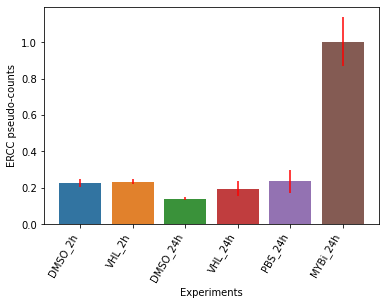

In [92]:
d= pd.DataFrame(data=r.values(),index=r.keys(), columns=['ERCC pseudo-counts','var'])
d['Experiments']=d.index
sns.barplot("Experiments","ERCC pseudo-counts",data=d,ci=None,)
plt.errorbar(x=range(0,len(d)),y=d['ERCC pseudo-counts'],
            yerr=d['var'], fmt='none', c= 'r')
plt.xticks(rotation=60,ha='right')
plt.savefig('../results/'+project+"/plots/"+version+"_scaling_fact_with_conf.pdf")

In [93]:
location= '../../data/'+project+'/res/count/'
mincount_toremove=5
minvar_toremove=0

In [94]:
readcounts, tccounts = readFromSlamdunk(loc=location,minvar_toremove=minvar_toremove, mincount_toremove=mincount_toremove)

found 23 files:dict_keys(['mr270-MV411-PBS_24h-r3_tcount', 'mr268-MV411-PBS_24h-r1_tcount', 'mr272-MV411-MYBi_24h-r1_tcount', 'mr269-MV411-PBS_24h-r2_tcount', 'mr263-MV411_MEF2D-DMSO_24h-r4_tcount', 'mr257-MV411_MEF2D-VHL_2h-r2_tcount', 'mr266-MV411_MEF2D-VHL_24h-r3_tcount', 'mr258-MV411_MEF2D-VHL_2h-r3_tcount', 'mr255-MV411_MEF2D-DMSO_2h-r4_tcount', 'mr259-MV411_MEF2D-VHL_2h-r4_tcount', 'mr253-MV411_MEF2D-DMSO_2h-r2_tcount', 'mr261-MV411_MEF2D-DMSO_24h-r2_tcount', 'mr256-MV411_MEF2D-VHL_2h-r1_tcount', 'mr254-MV411_MEF2D-DMSO_2h-r3_tcount', 'mr264-MV411_MEF2D-VHL_24h-r1_tcount', 'mr262-MV411_MEF2D-DMSO_24h-r3_tcount', 'mr267-MV411_MEF2D-VHL_24h-r4_tcount', 'mr265-MV411_MEF2D-VHL_24h-r2_tcount', 'mr273-MV411-MYBi_24h-r2_tcount', 'mr271-MV411-PBS_24h-r4_tcount', 'mr274-MV411-MYBi_24h-r3_tcount', 'mr260-MV411_MEF2D-DMSO_24h-r1_tcount', 'mr252-MV411_MEF2D-DMSO_2h-r1_tcount'])
2023 538
[772, 243] [12, 5]
787 93
[709, 174] [2, 0]
97 3
[533, 126] [4, 0]
250 33
[295, 50] [0, 0]
2341 440
[621, 

## SLAM-seq
All SLAM-seq assays were performed at 60-70% confluency for adherent cells or
60% of the maximum cell density counted on a hemocytometer for suspension cells. 5-7h
prior to each assay, growth medium was aspirated and replaced. Unless stated otherwise,
cells were pre-treated with indicated small molecule inhibitors or 100µM IAA for 30 min
to pre-establish full target inhibition or degradation. Newly synthesized RNA was labeled
for indicated time spans (45 min or 60 min) at a final concentration of 100µM 4-
thiouridine (4sU, Carbosynth). Adherent cells were harvested by direct snap-freezing of
plates on dry ice. Suspension cells were spun down and immediately snap-frozen. RNA
extraction was performed using the RNeasy Plus Mini Kit (Qiagen). 

Total RNA was subjected to alkylation by iodoacetamide (Sigma, 10mM) for 15 min and RNA was repurified by ethanol precipitation. 500ng alkylated RNA were used as input for generating
3’-end mRNA sequencing libraries using a commercially available kit (QuantSeq 3′
mRNA-Seq Library Prep Kit FWD for Illumina and PCR Add-on Kit for Illumina,
Lexogen). Deep sequencing was performed using HiSeq1500 and HiSeq2500 platforms
(Illumina).

0.06724463
0.04916348
0.03728357
0.05075007
0.03331248
0.0346662
0.03265504 
0.04416262
0.05574821
0.05845953
0.05531433
0.06175393
0.03181749 
0.02940226 
0.0306263
0.04004278

In [66]:
mkdir ../results/$project

In [96]:
pd.DataFrame(tccounts.values.astype(float)/readcounts.mean().values*100, columns=tccounts.columns, index=tccounts.index).to_csv('../results/' + project + '/'+version + '_'+str(minvar_toremove)+'_'+str(mincount_toremove)+'_ratio.csv')

In [97]:
col = tccounts.columns.tolist()
col.sort()
tccounts = tccounts[col]

In [98]:
col = readcounts.columns.tolist()
col.sort()
readcounts = readcounts[col]

In [28]:
readcounts

,mr193-MV411-MYBi_30m-r1_tcount,mr194-MV411-MYBi_30m-r2_tcount,mr195-MV411-MYBi_30m-r3_tcount,mr196-MV411-MYBi_30m-r4_tcount,mr197-MV411-PBS_30m-r1_tcount,mr198-MV411-PBS_30m-r2_tcount,mr199-MV411-PBS_30m-r3_tcount,mr200-MV411-PBS_30m-r4_tcount,mr201-MV411-MYBi_6h-r1_tcount,mr202-MV411-MYBi_6h-r2_tcount,...,mr210-MV411-MS2-r3_tcount,mr211-MV411-JQ1-r1_tcount,mr212-MV411-JQ1-r2_tcount,mr213-MV411-JQ1-r3_tcount,mr214-MV411-MS2_JQ1-r1_tcount,mr215-MV411-MS2_JQ1-r2_tcount,mr216-MV411-MS2_JQ1-r3_tcount,mr217-MV411-DMSO-r1_tcount,mr218-MV411-DMSO-r2_tcount,mr219-MV411-DMSO-r3_tcount
A2M,4,2,3,1,0,3,3,3,1,0,...,2,0,2,5,2,0,0,0,0,1
NAT1,33,41,65,29,77,68,38,74,37,32,...,182,151,105,146,134,175,165,172,170,124
AAMP,540,512,829,523,603,842,584,741,400,553,...,1601,1827,1399,1615,1652,1476,1566,1275,1481,739
AARS1,1230,1038,2124,1022,1616,2363,1263,1719,276,352,...,2508,1390,1157,1335,2181,2127,2355,1083,1278,671
ABAT,109,93,174,107,176,165,107,151,23,11,...,179,123,111,146,212,207,276,136,152,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107080638,281,221,502,264,408,517,274,359,138,132,...,940,896,800,921,1123,1132,1176,815,872,647
107080644,0,0,2,0,1,1,1,1,0,0,...,1,0,0,2,6,0,6,2,0,1
BOLA2-SMG1P6,4,8,6,6,9,6,3,7,6,4,...,17,15,17,12,11,18,13,11,18,6
107303344,126,96,230,81,165,200,145,161,33,25,...,111,75,72,69,109,80,149,81,84,64


In [95]:
readcounts.to_csv('../results/'+project+'/'+version+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)+'_readcounts.csv',index=False)
tccounts.to_csv('../results/'+project+'/'+version+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)+'_tccounts.csv',index=False)

In [22]:
readcounts = pd.read_csv('../results/'+project+'/'+version+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)+'_readcounts.csv')
tccounts = pd.read_csv('../results/'+project+'/'+version+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)+'_tccounts.csv')

### make more dataframes

In [99]:
mtccounts = pd.DataFrame()
mreadcounts = pd.DataFrame()
for i in set([i.split('-')[2] for i in tccounts.columns]):
    mtccounts[i] = tccounts[[v for v in tccounts.columns if i in v]].mean(1)
    mreadcounts[i] = readcounts[[v for v in readcounts.columns if i in v]].mean(1)

In [100]:
mtccounts.to_csv("../results/"+project+'/'+version+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)+"_mean_tccounts.csv")
mreadcounts.to_csv("../results/"+project+'/'+version+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)+"_mean_readcounts.csv")

In [101]:
mtccounts = pd.DataFrame()
mreadcounts = pd.DataFrame()
for i in set([i.split('-')[2] for i in tccounts.columns]):
    mtccounts[i] = tccounts[[v for v in tccounts.columns if i in v]].median(1)
    mreadcounts[i] = readcounts[[v for v in readcounts.columns if i in v]].median(1)

In [102]:
mtccounts.to_csv("../results/"+project+'/'+version+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)+"_median_tccounts.csv")
mreadcounts.to_csv("../results/"+project+'/'+version+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)+"_median_readcounts.csv")

In [103]:
(tccounts/readcounts).fillna(0).to_csv("../results/"+project+'/'+version+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)+"_tccounts_per_readcounts.csv")

# lets look at the similarity accross replicates

we have some outliers, else it seems to make some sense and on average, to be extremelly similar!

In [104]:
tccounts.columns = [i.replace('-','.') for i in tccounts.columns]
readcounts.columns = [i.replace('-','.') for i in readcounts.columns]

In [86]:
mkdir ../results/$project/plots/

In [105]:
tccounts

,mr252.MV411_MEF2D.DMSO_2h.r1_tcount,mr253.MV411_MEF2D.DMSO_2h.r2_tcount,mr254.MV411_MEF2D.DMSO_2h.r3_tcount,mr255.MV411_MEF2D.DMSO_2h.r4_tcount,mr256.MV411_MEF2D.VHL_2h.r1_tcount,mr257.MV411_MEF2D.VHL_2h.r2_tcount,mr258.MV411_MEF2D.VHL_2h.r3_tcount,mr259.MV411_MEF2D.VHL_2h.r4_tcount,mr260.MV411_MEF2D.DMSO_24h.r1_tcount,mr261.MV411_MEF2D.DMSO_24h.r2_tcount,...,mr265.MV411_MEF2D.VHL_24h.r2_tcount,mr266.MV411_MEF2D.VHL_24h.r3_tcount,mr267.MV411_MEF2D.VHL_24h.r4_tcount,mr268.MV411.PBS_24h.r1_tcount,mr269.MV411.PBS_24h.r2_tcount,mr270.MV411.PBS_24h.r3_tcount,mr271.MV411.PBS_24h.r4_tcount,mr272.MV411.MYBi_24h.r1_tcount,mr273.MV411.MYBi_24h.r2_tcount,mr274.MV411.MYBi_24h.r3_tcount
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NAT1,4,3,18,25,3,0,3,21,5,0,...,3,0,0,1,0,9,0,0,0,0
AAMP,7,5,17,10,5,1,11,19,18,0,...,15,0,1,7,0,21,0,0,0,0
AARS1,13,11,18,25,12,4,9,57,35,2,...,10,0,2,2,0,19,1,0,0,2
ABAT,1,1,2,3,0,0,0,5,6,0,...,5,0,0,1,0,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107080638,0,2,1,9,1,0,3,3,5,0,...,4,0,0,0,0,1,0,0,0,0
107080644,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
BOLA2-SMG1P6,0,0,0,1,0,0,0,2,0,0,...,4,0,0,0,0,0,0,0,0,0
107303344,1,0,2,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [106]:
(tccounts.loc["MYC"]/tccounts.mean(0)) /(readcounts.loc["MYC"]/readcounts.mean(0))

mr252.MV411_MEF2D.DMSO_2h.r1_tcount     20.906873
mr253.MV411_MEF2D.DMSO_2h.r2_tcount     19.818364
mr254.MV411_MEF2D.DMSO_2h.r3_tcount     15.779573
mr255.MV411_MEF2D.DMSO_2h.r4_tcount     15.709042
mr256.MV411_MEF2D.VHL_2h.r1_tcount      16.630023
mr257.MV411_MEF2D.VHL_2h.r2_tcount      37.013294
mr258.MV411_MEF2D.VHL_2h.r3_tcount      22.111163
mr259.MV411_MEF2D.VHL_2h.r4_tcount      12.809547
mr260.MV411_MEF2D.DMSO_24h.r1_tcount    14.052167
mr261.MV411_MEF2D.DMSO_24h.r2_tcount    21.296080
mr262.MV411_MEF2D.DMSO_24h.r3_tcount    14.070035
mr263.MV411_MEF2D.DMSO_24h.r4_tcount    14.261005
mr264.MV411_MEF2D.VHL_24h.r1_tcount     19.960913
mr265.MV411_MEF2D.VHL_24h.r2_tcount     18.007882
mr266.MV411_MEF2D.VHL_24h.r3_tcount     37.545131
mr267.MV411_MEF2D.VHL_24h.r4_tcount     38.671184
mr268.MV411.PBS_24h.r1_tcount           15.098137
mr269.MV411.PBS_24h.r2_tcount           31.536246
mr270.MV411.PBS_24h.r3_tcount           11.012571
mr271.MV411.PBS_24h.r4_tcount           22.792705


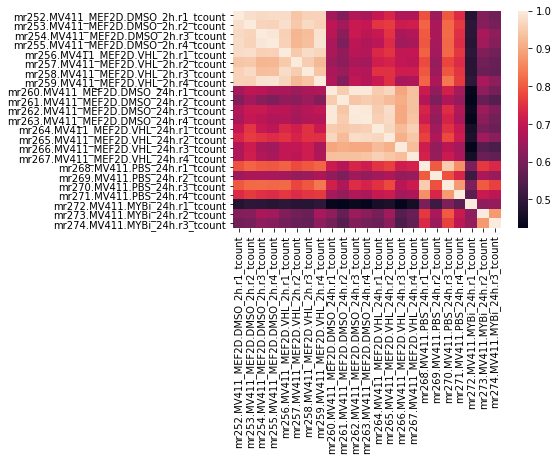

In [107]:
%matplotlib inline
sns.heatmap(tccounts.corr(), 
            xticklabels=tccounts.columns,
            yticklabels=tccounts.columns)
plt.savefig('../results/'+project+'/plots/'+version+'_similarity_replicates_sorted_readcounts.pdf')

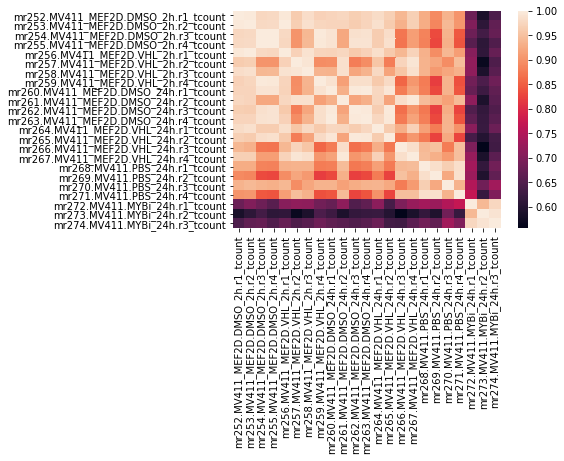

In [108]:
%matplotlib inline
sns.heatmap(readcounts.corr(), 
            xticklabels=readcounts.columns,
            yticklabels=readcounts.columns)
plt.savefig('../results/'+project+'/plots/'+version+'_similarity_replicates.pdf')

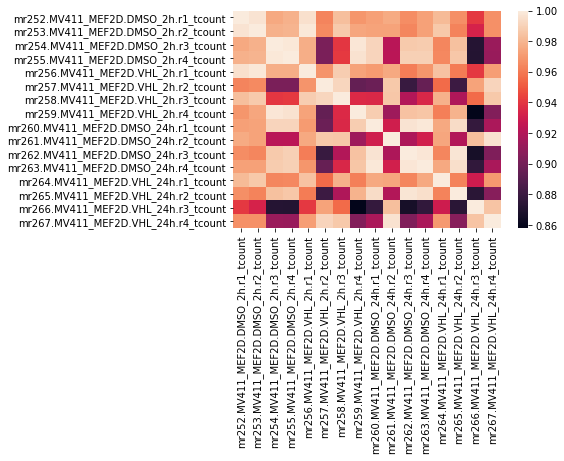

In [110]:
%matplotlib inline
sns.heatmap(readcounts[readcounts.columns[:16]].corr(), 
            xticklabels=readcounts.columns[:16],
            yticklabels=readcounts.columns[:16])
plt.savefig('../results/'+project+'/plots/'+version+'_similarity_replicates_MYBi.pdf')

The change with DMSO (PBS) 30m vs 6h is as striking to as the change with MYBi highlighting the impact of batches

### A quick detour to look for clustering

## Getting the Core TF information

In [111]:
ctf=pd.read_csv('../data/CTF.csv',header=None)[0].values.tolist()
ctf

['ARID2',
 'CEBPA',
 'CEBPE',
 'E2F3',
 'FLI1',
 'FOSL2',
 'GFI1',
 'GFI1B',
 'HHEX',
 'IRF8',
 'LYL1',
 'MEF2C',
 'MEF2D',
 'MEIS1',
 'MTF1',
 'MYB',
 'MYC',
 'PLAGL2',
 'RUNX1',
 'RUNX2',
 'RXRA',
 'SETDB1',
 'SNAPC5',
 'SP1',
 'SPI1',
 'SREBF1',
 'STAT5B',
 'TERF2',
 'TFAP4',
 'ZEB2',
 'ZFPM1',
 'ZMYND8',
 'LMO2',
 'MAX',
 'ELF2',
 'ETV6',
 'HOXA9',
 'GATA2']

In [112]:
set(ctf) & set(tccounts.index)

{'ARID2',
 'CEBPA',
 'CEBPE',
 'E2F3',
 'ELF2',
 'ETV6',
 'FLI1',
 'FOSL2',
 'GATA2',
 'GFI1',
 'GFI1B',
 'HHEX',
 'HOXA9',
 'IRF8',
 'LMO2',
 'LYL1',
 'MAX',
 'MEF2C',
 'MEF2D',
 'MEIS1',
 'MTF1',
 'MYB',
 'MYC',
 'PLAGL2',
 'RUNX1',
 'RUNX2',
 'RXRA',
 'SETDB1',
 'SNAPC5',
 'SP1',
 'SPI1',
 'SREBF1',
 'STAT5B',
 'TERF2',
 'TFAP4',
 'ZEB2',
 'ZFPM1',
 'ZMYND8'}

In [113]:
ctfpos = [val for val in tccounts.index if val in ctf]
notctfpos = [val for val in tccounts.index if val not in ctf]

In [114]:
ctfpos.extend(['EGR1','SERTAD1'])

We find a CTF not in the dataset

# Let's look at how they change accross time

how core transcription factors change accross time when the cell is with JQ1 conditions

we are looking at the difference between production of each CTF compared to the average RNA production with JQ1 and without JQ1

## DESEQ ANALYSIS

In [115]:
readcounts["genes"] = readcounts.index
readcounts = readcounts.reset_index(drop=True)
tccounts["genes"] = tccounts.index
tccounts = tccounts.reset_index(drop=True)

In [223]:
tccountsMEF2D= tccounts[tccounts.columns[:16]]
designMEF2D2 = pd.DataFrame(index= [i.replace('-','.') for i in tccountsMEF2D.columns], 
                      columns=['DMSO','VHL'], 
                      data=np.array([[1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
                                     [0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0]],dtype=bool).T)
designMEF2D24 = pd.DataFrame(index=[i.replace('-','.') for i in tccountsMEF2D.columns], 
                      columns=['DMSO','VHL'], 
                      data=np.array([[0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0],
                                     [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1]],dtype=bool).T)

In [123]:
tccountsMybi[tccountsMybi.columns[np.array(Mybi+[1],np.bool)]]

NameError: name 'Mybi' is not defined

In [224]:
### MYCi
tccountsMybi= tccounts[tccounts.columns[16:-1]]
designMybi24 = pd.DataFrame(index=[i.replace('-','.') for i in tccountsMybi.columns], 
                      columns=['DMSO','VHL'], 
                      data=np.array([[1,1,1,1,0,0,0],
                                     [0,0,0,0,1,1,1]],dtype=bool).T)

### Differential gene expression analysis, PCA and GO-term enrichment

For gene-level analysis, raw reads mapped to different UTR annotations of the same gene were summed up by Entrez Gene ID. Pilot studies of K562 cells with kinase inhibitors were performed as single experiments. 

Analysis of differential gene expression was restricted to genes with ≥ 10 reads in at least one condition for 50bp sequencing runs (flavopiridol and DMSO) or ≥ 20 reads in at least one condition for 100bp sequencing runs (mk2206, trametinib, nilotinib, trametinib + mk2206 and DMSO). For estimating differential expression, a pseudo-count of 1 raw read was added to all genes.

#### All other SLAM-seq experiments were performed in triplicates and analyzed as follows. 
Differential gene expression calling was performed on raw read counts with ≥ 2 T>C conversions using DESeq2 (version 1.14.1) with default settings, and with size factors estimated on corresponding total mRNA reads for global normalization.

Downstream analysis was restricted to genes passing all internal filters for FDR estimation by DESeq2. Principal component analysis was performed after variance
stabilizing transformation on the 500 most variable genes across all conditions of a given
experiment. GO-term enrichment analysis was performed on genes significantly and strongly downregulated (FDR ≤ 0.1, log2FC ≤ -1) in SLAM-seq upon IAA-treatment in K562MYC-AID + Tir1 by the PANTHER Overrepresentation Test (Fisher's Exact with FDR multiple test correction, release 20171205, http://pantherdb.org) on GO Ontology database Released 2017-12-27.

In [275]:
scaling="ERCCtrial"

### Mybi

In [256]:
Mybi = [1,1,1,1,1,1,1]
tccountsMybi= tccounts[tccounts.columns[16:]]
deseqMybi = pyDESeq2.pyDESeq2(count_matrix=tccountsMybi[tccountsMybi.columns[np.array(Mybi+[1],np.bool)]], design_matrix=designMybi24[np.array(Mybi,np.bool)],
                         design_formula="~DMSO - VHL",
                         gene_column="genes")

3.3.2


### MEF2D

In [257]:
MEF2D2 = [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0]
tccountsMEF2D= tccounts[list(tccounts.columns[:16])+list(tccounts.columns[-1:])]
deseqMEF2D2 = pyDESeq2.pyDESeq2(count_matrix = tccountsMEF2D[tccountsMEF2D.columns[np.array(MEF2D2+[1],np.bool)]],
                         design_matrix=designMEF2D2[np.array(MEF2D2,np.bool)],
                         design_formula="~DMSO - VHL",
                         gene_column="genes")
MEF2D24 = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]
deseqMEF2D24 = pyDESeq2.pyDESeq2(count_matrix = tccountsMEF2D[tccountsMEF2D.columns[np.array(MEF2D24+[1],np.bool)]],
                         design_matrix=designMEF2D24[np.array(MEF2D24,np.bool)],
                         design_formula="~DMSO - VHL",
                         gene_column="genes")

3.3.2
3.3.2


## estimating size factors

#### MYCi

In [10]:
readcountsMyci= readcounts[readcounts.columns[15:-1]]

deseqMS2.run_estimate_size_factors(geoMeans = np.exp(np.mean(np.log(
    readcountsMyci[readcountsMyci.columns[np.array([1,1,1,0,0,0,0,0,0,0,0,0], np.bool)]].values+1), 1)))

In [174]:
readcountsMybi= readcounts[readcounts.columns[:15]]

deseqMybi30.run_estimate_size_factors(geoMeans = np.exp(np.mean(np.log(readcountsMybi[readcountsMybi.columns[
        np.array([1,1,1,1,0,0,0,0,0,0,0,0,0,0,0],np.bool)]].values+1),1)))
deseqMybi6.run_estimate_size_factors(geoMeans = np.exp(np.mean(np.log(readcountsMybi[readcountsMybi.columns[
        np.array([0,0,0,0,0,0,0,0,1,1,1,1,0,0,0],np.bool)]].values+1),1)))

In [276]:
readcountsMEF2D= readcounts[readcounts.columns[:16]]

deseqMEF2D2.run_estimate_size_factors(geoMeans = np.exp(np.mean(np.log(readcountsMEF2D[readcountsMEF2D.columns[
        np.array([1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],np.bool)]].values+1),1)))
deseqMEF2D24.run_estimate_size_factors(geoMeans = np.exp(np.mean(np.log(readcountsMEF2D[readcountsMEF2D.columns[
        np.array([0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0],np.bool)]].values+1),1)))

In [277]:
readcountsMybi= readcounts[readcounts.columns[16:-1]]

deseqMybi.run_estimate_size_factors(geoMeans = np.exp(np.mean(np.log(
    readcountsMybi[readcountsMybi.columns[np.array([1,1,1,1,0,0,0], np.bool)]].values+1), 1)))

## other size factor estimations

In [135]:
# from https://www.cell.com/trends/genetics/pdf/S0168-9525(13)00089-9.pdf FFROM THOUSANDS OF SAMPLES
housekeeping1 = ["C1orf43", "CHMP2A", "EMC7", "GPI", "PSMB2", "PSMB4", "RAB7A", "REEP5", "SNRPD3", "VCP", "VPS29"]

#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4760967/ FOR CANCER CELL LINES
housekeeping2 = ['18S rRNA',
'ACTB',
'B2M',
'G6PD',
'GAPDH',
'GUSB',
'HMBS',
'HPRT1',
'PGK1',
'PPIA',
'RPL13a',
'SDHA',
'TBP',
'TUBB',
'YWHAZ']

In [136]:
housekeeping = readcounts.genes.isin(housekeeping2)

In [139]:
readcountsMybi= readcounts[readcounts.columns[16:-1]]
np.exp(np.mean(np.log(
    readcountsMybi[readcountsMybi.columns[np.array([1,1,1,1,0,0,0], np.bool)]].values+1), 1))

array([  2.37841423,  65.42519431, 836.23056631, ...,   9.36138928,
        95.49529375,   1.        ])

In [231]:
readcountsMybi= readcounts[readcounts.columns[16:-1]]

deseqMybi.run_estimate_size_factors(geoMeans = np.exp(np.mean(np.log(
    readcountsMybi[readcountsMybi.columns[np.array([1,1,1,1,0,0,0], np.bool)]].values+1), 1)), controlGenes=housekeeping)

In [232]:
readcountsMEF2D= readcounts[readcounts.columns[:16]]

deseqMEF2D2.run_estimate_size_factors(geoMeans = np.exp(np.mean(np.log(readcountsMEF2D[readcountsMEF2D.columns[
        np.array([1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],np.bool)]].values+1),1)), controlGenes=housekeeping)
deseqMEF2D24.run_estimate_size_factors(geoMeans = np.exp(np.mean(np.log(readcountsMEF2D[readcountsMEF2D.columns[
        np.array([0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0],np.bool)]].values+1),1)), controlGenes=housekeeping)

## Modifying size factors

In [278]:
sizeFact = deseqMybi.getSizeFactors()

In [279]:
sizeFact

array([1.72875705, 0.61936245, 7.2332409 , 0.68908538, 0.31830308,
       0.9602762 , 0.61302502])

In [207]:
r

{'DMSO_2h': [0.2243153232470735, 0.02204177171648129],
 'VHL_2h': [0.23495725535742493, 0.012366178880134462],
 'DMSO_24h': [0.14047889898493598, 0.0068663572605201255],
 'VHL_24h': [0.1960673739532328, 0.04013998428238451],
 'PBS_24h': [0.23538398133738964, 0.06424715552832781],
 'MYBi_24h': [1.0041758119681277, 0.13391993501133953]}

In [280]:
sizeFact[4:] = sizeFact[4:]*(r['MYBi_24h'][0]/r['PBS_24h'][0])

In [281]:
deseqMybi.setSizeFactors(sizeFact)

In [282]:
sizeFact = deseqMEF2D24.getSizeFactors()

In [283]:
sizeFact[4:] = sizeFact[4:]*(r['VHL_24h'][0]/r['DMSO_24h'][0])

In [284]:
deseqMEF2D24.setSizeFactors(sizeFact)

## running it

In [285]:
deseqMybi.run_deseq()
deseqMybi.get_deseq_result()
resMybi = deseqMybi.deseq_result
resMybi.pvalue = np.nan_to_num(np.array(resMybi.pvalue), 1)
resMybi.log2FoldChange = np.nan_to_num(np.array(resMybi.log2FoldChange), 0)
resMybi.log2FoldChange = -resMybi.log2FoldChange
resMybi["gene_id"] = resMybi.genes

R[write to console]: using pre-existing size factors

R[write to console]: estimating dispersions

R[write to console]: found already estimated dispersions, replacing these

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



In [286]:
deseqMEF2D2.run_deseq()
deseqMEF2D24.run_deseq()
deseqMEF2D2.get_deseq_result()
deseqMEF2D24.get_deseq_result()
resMEF2D2 = deseqMEF2D2.deseq_result
resMEF2D24 = deseqMEF2D24.deseq_result
resMEF2D2.pvalue = np.nan_to_num(np.array(resMEF2D2.pvalue), 1)
resMEF2D2.log2FoldChange = np.nan_to_num(np.array(resMEF2D2.log2FoldChange), 0)
resMEF2D24.pvalue = np.nan_to_num(np.array(resMEF2D24.pvalue), 1)
resMEF2D24.log2FoldChange = np.nan_to_num(np.array(resMEF2D24.log2FoldChange), 0)
resMEF2D24.log2FoldChange = -resMEF2D24.log2FoldChange
resMEF2D2.log2FoldChange = -resMEF2D2.log2FoldChange
resMEF2D2["gene_id"] = resMEF2D2.genes
resMEF2D24["gene_id"] = resMEF2D24.genes

R[write to console]: using pre-existing size factors

R[write to console]: estimating dispersions

R[write to console]: found already estimated dispersions, replacing these

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: using pre-existing size factors

R[write to console]: estimating dispersions

R[write to console]: found already estimated dispersions, replacing these

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



In [92]:
deseqMS2.run_deseq()
deseqJQ1.run_deseq()
deseqMS2_JQ1.run_deseq()
deseqMS2.get_deseq_result()
deseqJQ1.get_deseq_result()
deseqMS2_JQ1.get_deseq_result()
resMS2 = deseqMS2.deseq_result
resJQ1 = deseqJQ1.deseq_result
resMS2_JQ1 = deseqMS2_JQ1.deseq_result
resMS2.pvalue = np.nan_to_num(np.array(resMS2.pvalue), 1)
resMS2.log2FoldChange = np.nan_to_num(np.array(resMS2.log2FoldChange), 0)
resJQ1.pvalue = np.nan_to_num(np.array(resJQ1.pvalue), 1)
resJQ1.log2FoldChange = np.nan_to_num(np.array(resJQ1.log2FoldChange), 0)
resMS2_JQ1.pvalue = np.nan_to_num(np.array(resMS2_JQ1.pvalue), 1)
resMS2_JQ1.log2FoldChange = np.nan_to_num(np.array(resMS2_JQ1.log2FoldChange), 0)
resMS2.log2FoldChange = -resMS2.log2FoldChange
resJQ1.log2FoldChange = -resJQ1.log2FoldChange
resMS2_JQ1.log2FoldChange = -resMS2_JQ1.log2FoldChange
resMS2["gene_id"] = resMS2.genes
resJQ1["gene_id"] = resJQ1.genes
resMS2_JQ1["gene_id"] = resMS2_JQ1.genes

R[write to console]: using pre-existing size factors

R[write to console]: estimating dispersions

R[write to console]: found already estimated dispersions, replacing these

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: using pre-existing size factors

R[write to console]: estimating dispersions

R[write to console]: found already estimated dispersions, replacing these

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: using pre-existing size factors

R[write to console]: estimating dispersions

R[write to console]: found already estimated dispersions, replacing these

R[write to console]: gene-wise dispersion estimates

R[write to console]: me

In [468]:
deseqMybi30.run_deseq()
deseqMybi6.run_deseq()
deseqMybi30.get_deseq_result()
deseqMybi6.get_deseq_result()
resMybi30 = deseqMybi30.deseq_result
resMybi6 = deseqMybi6.deseq_result
resMybi30.pvalue = np.nan_to_num(np.array(resMybi30.pvalue), 1)
resMybi30.log2FoldChange = np.nan_to_num(np.array(resMybi30.log2FoldChange), 0)
resMybi6.pvalue = np.nan_to_num(np.array(resMybi6.pvalue), 1)
resMybi6.log2FoldChange = np.nan_to_num(np.array(resMybi6.log2FoldChange), 0)
resMybi6.log2FoldChange = -resMybi6.log2FoldChange
resMybi30.log2FoldChange = -resMybi30.log2FoldChange
resMybi30["gene_id"] = resMybi30.genes
resMybi6["gene_id"] = resMybi6.genes

R[write to console]: using pre-existing size factors

R[write to console]: estimating dispersions

R[write to console]: found already estimated dispersions, replacing these

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: using pre-existing size factors

R[write to console]: estimating dispersions

R[write to console]: found already estimated dispersions, replacing these

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: -- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

R[write to console]: final dispersion estimates

R[write to console]: fitting model an

## PLOTS

### whisker's plots

In [141]:
%matplotlib inline

In [469]:
res = resMybi30[resMybi30.baseMean>10]
res.baseMean= np.log2(1+res.baseMean)
res["type"] = ['ctf' if i else "other" for i in  res.genes.isin(ctf)]

/home/jeremie/.local/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-469-48ffebc3b001>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["type"] = ['ctf' if i else "other" for i in  res.genes.isin(ctf)]


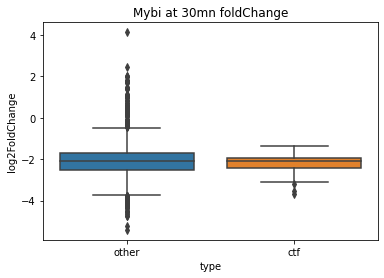

In [470]:
ax = sns.boxplot(data=res,x='type',y='log2FoldChange').set_title("Mybi at 30mn foldChange")
ax.figure.savefig('../results/'+project+"/plots/"+version+"_"+scaling+"_whiskersMybi_30mn_logfch.pdf")

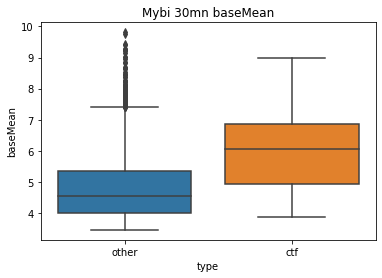

In [471]:
ax =sns.boxplot(data=res,x='type',y='baseMean')
ax.set_title("Mybi 30mn baseMean")
ax.figure.savefig('../results/'+project+"/plots/"+version+"_"+scaling+"_whiskers_Mybi_30mn_baseMean.pdf")

In [205]:
res = resMybi6[resMybi6.baseMean>10]
res.baseMean= np.log2(1+res.baseMean)
res["type"] = ['ctf' if i else "other" for i in  res.genes.isin(ctf)]

/home/jeremie/.local/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-205-82478fb37811>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["type"] = ['ctf' if i else "other" for i in  res.genes.isin(ctf)]


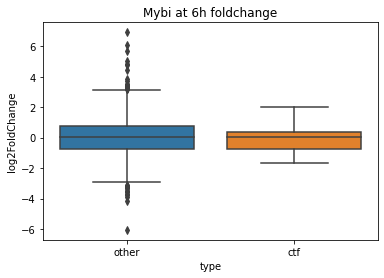

In [206]:
ax= sns.boxplot(data=res,x='type',y='log2FoldChange')
ax.set_title("Mybi at 6h foldchange")
ax.figure.savefig('../results/'+project+"/plots/"+version+"_"+scaling+"_whiskers_Mybi_6h_logfch.pdf")

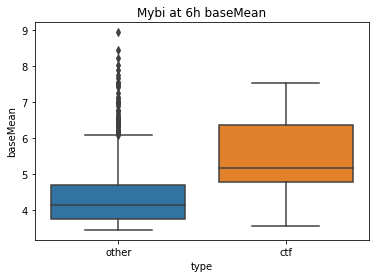

In [207]:
ax = sns.boxplot(data=res,x='type',y='baseMean')
ax.set_title("Mybi at 6h baseMean")
ax.figure.savefig('../results/'+project+"/plots/"+version+"_"+scaling+"_whiskers_Mybi_6h_baseMean.pdf")

In [287]:
res = resMybi[resMybi.baseMean>10]
res.baseMean= np.log2(1+res.baseMean)
res["type"] = ['ctf' if i else "other" for i in  res.genes.isin(ctf)]

/home/jeremie/.local/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-287-9c3423f32532>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["type"] = ['ctf' if i else "other" for i in  res.genes.isin(ctf)]


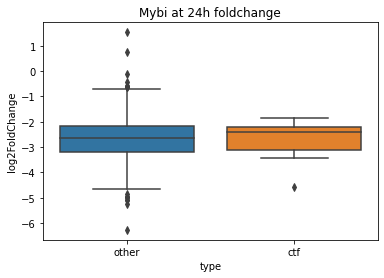

In [288]:
ax= sns.boxplot(data=res,x='type',y='log2FoldChange')
ax.set_title("Mybi at 24h foldchange")
ax.figure.savefig('../results/'+project+"/plots/"+version+"_"+scaling+"_whiskers_Mybi_24h_logfch.pdf")

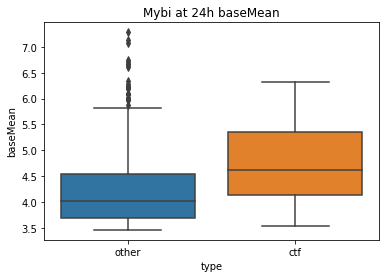

In [289]:
ax = sns.boxplot(data=res,x='type',y='baseMean')
ax.set_title("Mybi at 24h baseMean")
ax.figure.savefig('../results/'+project+"/plots/"+version+"_"+scaling+"_whiskers_Mybi_24h_baseMean.pdf")

#### MEF2D

In [290]:
res = resMEF2D2[resMEF2D2.baseMean>10]
res.baseMean= np.log2(1+res.baseMean)
res["type"] = ['ctf' if i else "other" for i in  res.genes.isin(ctf)]

/home/jeremie/.local/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-290-7dea2ee8b938>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["type"] = ['ctf' if i else "other" for i in  res.genes.isin(ctf)]


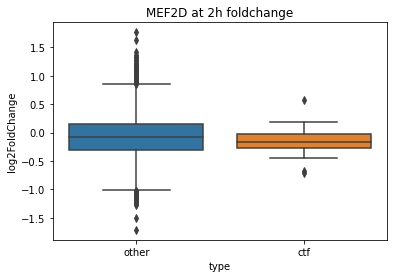

In [291]:
ax= sns.boxplot(data=res,x='type',y='log2FoldChange')
ax.set_title("MEF2D at 2h foldchange")
ax.figure.savefig('../results/'+project+"/plots/"+version+"_"+scaling+"_whiskers_MEF2D_2h_logfch.pdf")

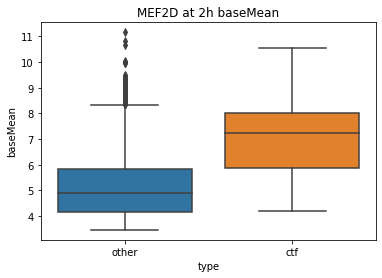

In [292]:
ax = sns.boxplot(data=res,x='type',y='baseMean')
ax.set_title("MEF2D at 2h baseMean")
ax.figure.savefig('../results/'+project+"/plots/"+version+"_"+scaling+"_whiskers_MEF2D_2h_baseMean.pdf")

In [293]:
res = resMEF2D24[resMEF2D24.baseMean>10]
res.baseMean= np.log2(1+res.baseMean)
res["type"] = ['ctf' if i else "other" for i in  res.genes.isin(ctf)]

/home/jeremie/.local/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-293-bc2ba62415de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["type"] = ['ctf' if i else "other" for i in  res.genes.isin(ctf)]


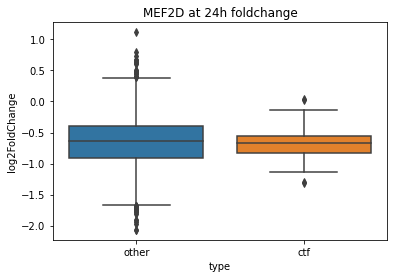

In [294]:
ax= sns.boxplot(data=res,x='type',y='log2FoldChange')
ax.set_title("MEF2D at 24h foldchange")
ax.figure.savefig('../results/'+project+"/plots/"+version+"_"+scaling+"_whiskers_MEF2D_24h_logfch.pdf")

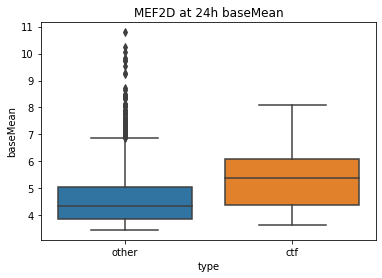

In [295]:
ax = sns.boxplot(data=res,x='type',y='baseMean')
ax.set_title("MEF2D at 24h baseMean")
ax.figure.savefig('../results/'+project+"/plots/"+version+"_"+scaling+"_whiskers_MEF2D_24h_baseMean.pdf")

##### Myci

In [96]:
res = resJQ1[resJQ1.baseMean>10]
res.baseMean= np.log2(1+res.baseMean)
res["type"] = ['ctf' if i else "other" for i in  res.genes.isin(ctf)]

/home/jeremie/.local/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-96-625ed54343ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["type"] = ['ctf' if i else "other" for i in  res.genes.isin(ctf)]


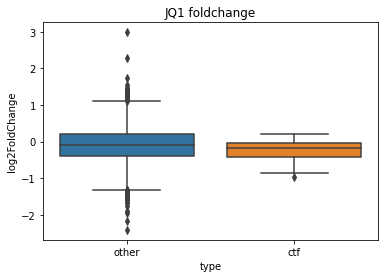

In [97]:
ax = sns.boxplot(data=res,x='type',y='log2FoldChange')
ax.set_title("JQ1 foldchange")
ax.figure.savefig('../results/'+project+"/plots/"+version+"_"+scaling+"_whiskers_JQ1_logfch.pdf")

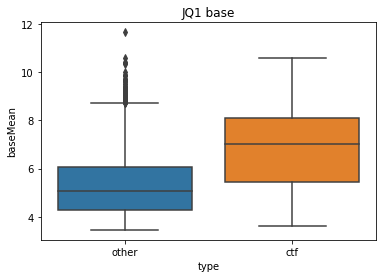

In [98]:
ax =sns.boxplot(data=res,x='type',y='baseMean')
ax.set_title("JQ1 base")
ax.figure.savefig('../results/'+project+"/plots/"+version+"_"+scaling+"_whiskers_JQ1_baseMean.pdf")

In [99]:
res = resMS2[resMS2.baseMean>10]
res.baseMean= np.log2(1+res.baseMean)
res["type"] = ['ctf' if i else "other" for i in  res.genes.isin(ctf)]

/home/jeremie/.local/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-99-e69356b5065c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["type"] = ['ctf' if i else "other" for i in  res.genes.isin(ctf)]


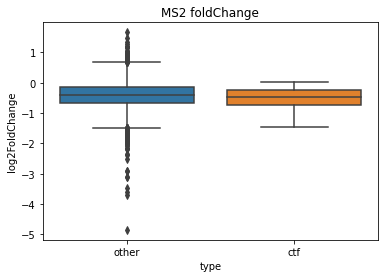

In [100]:
ax =sns.boxplot(data=res,x='type',y='log2FoldChange')
ax.set_title("MS2 foldChange")
ax.figure.savefig('../results/'+project+"/plots/"+version+"_"+scaling+"_whiskers_MS2_logfch.pdf")

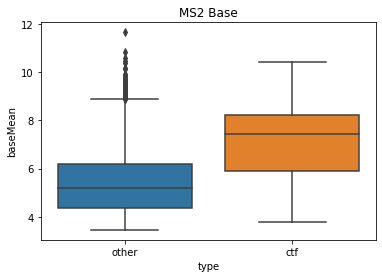

In [101]:
ax = sns.boxplot(data=res,x='type',y='baseMean')
ax.set_title("MS2 Base")
ax.figure.savefig('../results/'+project+"/plots/"+version+"_"+scaling+"_whiskers_MS2_baseMean.pdf")

In [102]:
res = resMS2_JQ1[resMS2_JQ1.baseMean>10]
res.baseMean= np.log2(1+res.baseMean)
res["type"] = ['ctf' if i else "other" for i in  res.genes.isin(ctf)]

/home/jeremie/.local/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-102-3a7f333fb32e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["type"] = ['ctf' if i else "other" for i in  res.genes.isin(ctf)]


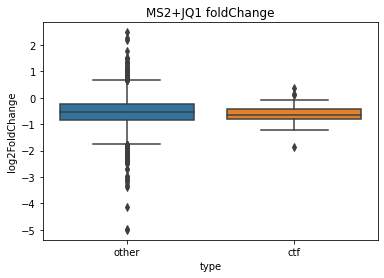

In [103]:
ax = sns.boxplot(data=res,x='type',y='log2FoldChange')
ax.set_title("MS2+JQ1 foldChange")
ax.figure.savefig('../results/'+project+"/plots/"+version+"_"+scaling+"_whiskers_MS2_JQ1_logfch.pdf")

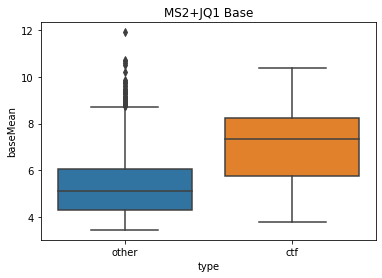

In [104]:
ax = sns.boxplot(data=res,x='type',y='baseMean')
ax.set_title("MS2+JQ1 Base")
ax.figure.savefig('../results/'+project+"/plots/"+version+"_"+scaling+"_whiskers_MS2_JQ1_baseMean.pdf")

## Scatter plot comparison

In [466]:
mix = pd.DataFrame()
mix["gene_id"] = resMybi30["gene_id"]
mix['Mybi 30mn'] = resMybi30.log2FoldChange
mix['Mybi 6h'] = resMybi6.log2FoldChange

In [467]:
scatter(mix[['Mybi 30mn','Mybi 6h']].values[:12000], 
               mix['gene_id'].values.tolist()[:12000], radi= 0.06, alpha=0.3,
              colors = [0 if i in ctf else 1 for i in mix['gene_id'].values.tolist()[:12000]],
       xname="Mybi 30mn",
    yname="Mybi 6h",
       folder='../results/'+project+"/plots/"+version+"_"+scaling+"_",
       title='Mybi 30mn vs 6h differences in logFoldChange')

Figure(id='9940', ...)

## Regular volcanos

In [12]:
resMS2.to_csv("../results/"+project+"/"+version+'_'+scaling+"_"+str(minvar_toremove)+'_'+str(mincount_toremove)+'_MS2_deseq.csv')
resJQ1.to_csv("../results/"+project+"/"+version+'_'+scaling+"_"+str(minvar_toremove)+'_'+str(mincount_toremove)+'_JQ1_deseq.csv')
resMS2_JQ1.to_csv("../results/"+project+"/"+version+'_'+scaling+"_"+str(minvar_toremove)+'_'+str(mincount_toremove)+'_MS2_JQ1_deseq.csv')

In [226]:
resMybi30.to_csv("../results/"+project+"/"+version+'_'+scaling+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)+'_Mybi_30um_deseq.csv')
resMybi6.to_csv("../results/"+project+"/"+version+'_'+scaling+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)+'_Mybi_6h_deseq.csv')

In [296]:
resMybi.to_csv("../results/"+project+"/"+version+'_'+scaling+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)+'_Mybi_24h_deseq.csv')

In [297]:
resMEF2D2.to_csv("../results/"+project+"/"+version+'_'+scaling+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)+'_MEF2D_2h_deseq.csv')
resMEF2D24.to_csv("../results/"+project+"/"+version+'_'+scaling+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)+'_MEF2D_24h_deseq.csv')

we can conclude that we get similar results to the slamseq myc paper although it seems that our values are a bit skewed toward higher expression than what is on the slamseq paper. It mightt be explained by the pseudo count of 1 that I did not set. Because I think it would highly bias the DESeq algorithm.

In [95]:
show(volcano(resMS2,tohighlight=ctf, searchbox=True, title='DESeq results of MV411 under MS2 in volcano plot', folder='../results/'+project+'/plots/'+version+'_'+scaling+"_"+str(minvar_toremove)+'_'+str(mincount_toremove)))
show(volcano(resJQ1,tohighlight=ctf, searchbox=True, title='DESeq results of MV411 under JQ1 in volcano plot', folder='../results/'+project+'/plots/'+version+'_'+scaling+"_"+str(minvar_toremove)+'_'+str(mincount_toremove)))
show(volcano(resMS2_JQ1,tohighlight=ctf, searchbox=True, title='DESeq results of MV411 under MS2 and JQ1 in volcano plot', folder='../results/'+project+'/plots/'+version+'_'+scaling+"_"+str(minvar_toremove)+'_'+str(mincount_toremove)))

### Mybi

In [112]:
resMybi30[resMybi30.gene_id=="MYB"]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes,gene_id
1990,58.642225,-0.630119,0.221291,2.847465,0.004407,0.034086,MYB,MYB


In [109]:
show(volcano(resMybi30,tohighlight=ctf, searchbox=True, title="Mybi at 30mn", folder='../results/'+project+'/plots/'+version+'_'+scaling+"_"+str(minvar_toremove)+'_'+str(mincount_toremove)))

In [111]:
resMybi6[resMybi6.gene_id=='MYB']

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes,gene_id
1990,44.896318,-0.576164,0.277444,2.07669,0.03783,0.115454,MYB,MYB


In [110]:
show(volcano(resMybi6,tohighlight=ctf, searchbox=True, title="Mybi at 6h", folder='../results/'+project+'/plots/'+version+'_'+scaling+"_"+str(minvar_toremove)+'_'+str(mincount_toremove),maxvalue=50))

In [298]:
show(volcano(resMybi,tohighlight=ctf, searchbox=True, title="Mybi at 24h", folder='../results/'+project+'/plots/'+version+'_'+scaling+"_"+str(minvar_toremove)+'_'+str(mincount_toremove),maxvalue=50))

### MEF2D

In [299]:
show(volcano(resMEF2D2,tohighlight=ctf, searchbox=True, title="MEF2D at 2h", folder='../results/'+project+'/plots/'+version+'_'+scaling+"_"+str(minvar_toremove)+'_'+str(mincount_toremove),maxvalue=50))
show(volcano(resMEF2D24,tohighlight=ctf, searchbox=True, title="MEF2D at 24h", folder='../results/'+project+'/plots/'+version+'_'+scaling+"_"+str(minvar_toremove)+'_'+str(mincount_toremove),maxvalue=50))